In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#設定圖表使用樣式
plt.style.use('ggplot')
#建立自己常用的顏色清單，方便在畫圖時可以直接使用
colors = ['#FE5C5C','#F3A659','#67AC83','#4D83B9']

這邊要分析的資料ODEC各國從2001年到2019年四個季度的GDP資料，不過這份資料有經過一些處理，所以裡面有一些特殊的空值或是極端值，需要先進行資料清理才能開始分析：

In [2]:
#讀入資料
gdp_data = pd.read_excel('OECDoutlook2019.xls',sheet_name=0,header=4,skipfooter=1,na_values=['NAN','NC']).drop(0,axis=0)
gdp_data

,Time,Unnamed: 1,Unnamed: 2,Q1-2001,Q2-2001,Q3-2001,Q4-2001,Q1-2002,Q2-2002,Q3-2002,...,Q3-2018,Q4-2018,Q1-2019,Q2-2019,Q3-2019,Q4-2019,Q1-2020,Q2-2020,Q3-2020,Q4-2020
1,Australia,"Percentage, 2016-17",i,7.284177,0.586820,3.902116,1.238723,6.521458,0.218274,3.822407,...,3.102319,4.077926,1.297008,2.585933e+00,2.375830e+00,2.365768e+00,2.505148,2.583722,2.663560,2.754584
2,Austria,"Percentage, 2010",i,1.753404,1.843686,1.123049,2.706553,-1.943428,3.400707,1.984475,...,2.125897,0.522983,2.013986,1.000000e+11,1.000000e+11,1.000000e+11,2.612051,1.976374,1.660429,-0.212443
3,Belgium,"Percentage, 2016",i,-0.564691,6.291900,1.132541,1.580085,1.399343,0.903091,1.547440,...,-0.817521,4.252752,-0.087326,1.711886e+00,1.510796e+00,1.510852e+00,1.928811,2.113820,2.116804,NaN
4,Canada,"Percentage, 2012",i,3.939644,-0.058260,-4.528322,-3.158633,1.813340,7.198236,2.694707,...,2.279631,-3.057265,1.433482,1.654673e+00,1.655228e+00,1.694995e+00,1.695121,1.695256,1.695386,NaN
5,Chile,"Percentage, 2013",i,0.418974,6.542847,6.572205,2.570137,-0.769914,2.528195,8.925561,...,0.694751,1.904647,1.908810,2.976578e+00,3.223315e+00,3.138834e+00,3.197454,3.134469,3.011001,NaN
6,Estonia,"Percentage, 2010",i,-1.292546,10.955903,4.843683,8.892631,2.461343,4.028246,2.125138,...,8.737726,-0.008515,4.537370,3.072695e+00,3.418312e+00,3.417273e+00,NaN,3.316955,3.314993,NaN
7,Finland,"Percentage, 2010",i,8.441849,0.726557,0.471672,-0.342922,2.170213,1.910587,0.275371,...,3.020987,0.657962,6.680069,NaN,1.697027e+00,1.697698e+00,1.898746,1.898785,1.914648,NaN
8,France,"Percentage, 2014",i,1.643698,2.462088,1.803372,2.194097,2.712702,1.220012,1.904961,...,1.511904,1.273151,1.613411,2.999693e-01,1.294233e+00,1.281088e+00,1.243538,1.257725,1.194347,NaN
9,Germany,"Percentage, 2010",i,2.794677,0.904227,2.375727,2.597700,1.109621,-0.904783,2.743560,...,2.512478,1.196120,1.454679,2.312661e+00,2.014838e+00,2.005030e+00,2.049350,2.053244,2.057059,NaN
10,Greece,"Percentage, 2010",i,8.277442,5.053384,3.615555,2.438599,4.430304,1.462776,1.773334,...,0.715774,-0.279772,-0.292100,1.892699e+00,1.448238e+00,1.214746e+00,1.059103,1.060094,1.061413,NaN


成功將資料讀入之後，我們發現有些欄位是我們不會使用到的，所以我們要先將其刪除，再者為方便後續更容易提取資料，我們要先讓索引(index)設定為每隔國家，然後將欄位名稱處理為時間序列的物件:datetime()

In [3]:
#將不必要的欄位去除，修改欄位名稱以及設定索引欄位
gdp_data = gdp_data.drop(['Unnamed: 1','Unnamed: 2'],axis=1).rename(columns={'Time':'country'})
gdp_data = gdp_data.set_index('country')

gdp_data.head()

,Q1-2001,Q2-2001,Q3-2001,Q4-2001,Q1-2002,Q2-2002,Q3-2002,Q4-2002,Q1-2003,Q2-2003,...,Q3-2018,Q4-2018,Q1-2019,Q2-2019,Q3-2019,Q4-2019,Q1-2020,Q2-2020,Q3-2020,Q4-2020
country,,,,,,,,,,,,,,,,,,,,,
Australia,7.284177,0.586820,3.902116,1.238723,6.521458,0.218274,3.822407,3.458965,3.717711,1.964569,...,3.102319,4.077926,1.297008,2.585933e+00,2.375830e+00,2.365768e+00,2.505148,2.583722,2.663560,2.754584
Austria,1.753404,1.843686,1.123049,2.706553,-1.943428,3.400707,1.984475,0.396027,1.951757,0.231816,...,2.125897,0.522983,2.013986,1.000000e+11,1.000000e+11,1.000000e+11,2.612051,1.976374,1.660429,-0.212443
Belgium,-0.564691,6.291900,1.132541,1.580085,1.399343,0.903091,1.547440,2.282715,NaN,2.822059,...,-0.817521,4.252752,-0.087326,1.711886e+00,1.510796e+00,1.510852e+00,1.928811,2.113820,2.116804,NaN
Canada,3.939644,-0.058260,-4.528322,-3.158633,1.813340,7.198236,2.694707,5.174622,5.693128,-3.322337,...,2.279631,-3.057265,1.433482,1.654673e+00,1.655228e+00,1.694995e+00,1.695121,1.695256,1.695386,NaN
Chile,0.418974,6.542847,6.572205,2.570137,-0.769914,2.528195,8.925561,5.166619,1.881807,4.125003,...,0.694751,1.904647,1.908810,2.976578e+00,3.223315e+00,3.138834e+00,3.197454,3.134469,3.011001,NaN


In [4]:
#修改時間序列欄位名稱為%Y%m%D的格式
q = {'Q1':'03-31','Q2':'06-30','Q3':'09-30','Q4':'12-31'}
for e in q:
    gdp_data.columns = gdp_data.columns.str.replace(e,q[e])

#將所有時間序列欄位名稱轉換為datetime物件
gdp_data.columns = pd.to_datetime(gdp_data.columns)
gdp_data.columns

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
      

處理完索引與欄位的部分之後，接下來就是處理資料內容中的極端值，這張資料的極端值主要有兩種，一種是數值極大的值像是9999999.99，另一種則是未來時間的值，例如說我們現在明明還在2019年，但這筆資料卻出現了2020年的GDP資料

In [5]:
#處理異常數值為空值
gdp_data = gdp_data.apply(lambda col: col.apply(lambda x:np.nan if x>100 else x))
gdp_data.head()

,2001-03-31,2001-06-30,2001-09-30,2001-12-31,2002-03-31,2002-06-30,2002-09-30,2002-12-31,2003-03-31,2003-06-30,...,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31
country,,,,,,,,,,,,,,,,,,,,,
Australia,7.284177,0.586820,3.902116,1.238723,6.521458,0.218274,3.822407,3.458965,3.717711,1.964569,...,3.102319,4.077926,1.297008,2.585933,2.375830,2.365768,2.505148,2.583722,2.663560,2.754584
Austria,1.753404,1.843686,1.123049,2.706553,-1.943428,3.400707,1.984475,0.396027,1.951757,0.231816,...,2.125897,0.522983,2.013986,NaN,NaN,NaN,2.612051,1.976374,1.660429,-0.212443
Belgium,-0.564691,6.291900,1.132541,1.580085,1.399343,0.903091,1.547440,2.282715,NaN,2.822059,...,-0.817521,4.252752,-0.087326,1.711886,1.510796,1.510852,1.928811,2.113820,2.116804,NaN
Canada,3.939644,-0.058260,-4.528322,-3.158633,1.813340,7.198236,2.694707,5.174622,5.693128,-3.322337,...,2.279631,-3.057265,1.433482,1.654673,1.655228,1.694995,1.695121,1.695256,1.695386,NaN
Chile,0.418974,6.542847,6.572205,2.570137,-0.769914,2.528195,8.925561,5.166619,1.881807,4.125003,...,0.694751,1.904647,1.908810,2.976578,3.223315,3.138834,3.197454,3.134469,3.011001,NaN


接著，我們嘗試將加拿大的資料視覺化，我們先利用折線圖看看他的資料趨勢

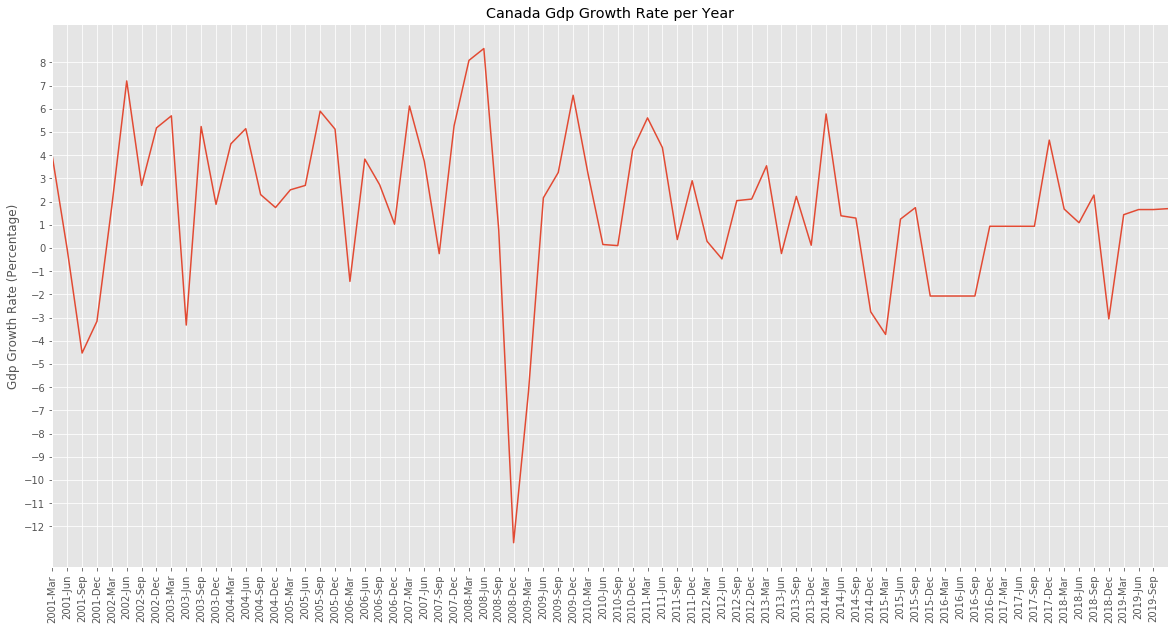

In [6]:
plt.figure(figsize=(20,10))

#繪製加拿大GDP成長率折線圖
gdp_data.loc['Canada'].interpolate(method='nearest').plot(label=e)

#圖表設定
plt.title('Canada Gdp Growth Rate per Year')  #圖表標題
plt.yticks(np.arange(-12,9,1))  #Y軸刻度設定
plt.ylabel('Gdp Growth Rate (Percentage)')  #Y軸名稱與單位

#設定時間範圍，避免2020年的異常資料出現
drange = pd.date_range(start='2001-01-01',end='2019-12-01',freq='Q')
plt.xticks(drange,drange.strftime('%Y-%b'),rotation=90)  #X軸刻度設定
plt.xlim(datetime(2001,3,1),datetime(2019,12,31))  #X軸兩端極限設定
plt.show()

為了能夠更清楚區分正負兩個區間的數值，我們改使用發散型長條圖顯示每個季度的資料，並使用顏色區分正負數值，然後我們另外也繪製了ODEC的總GDP以方便作為除了0之外的比較標準

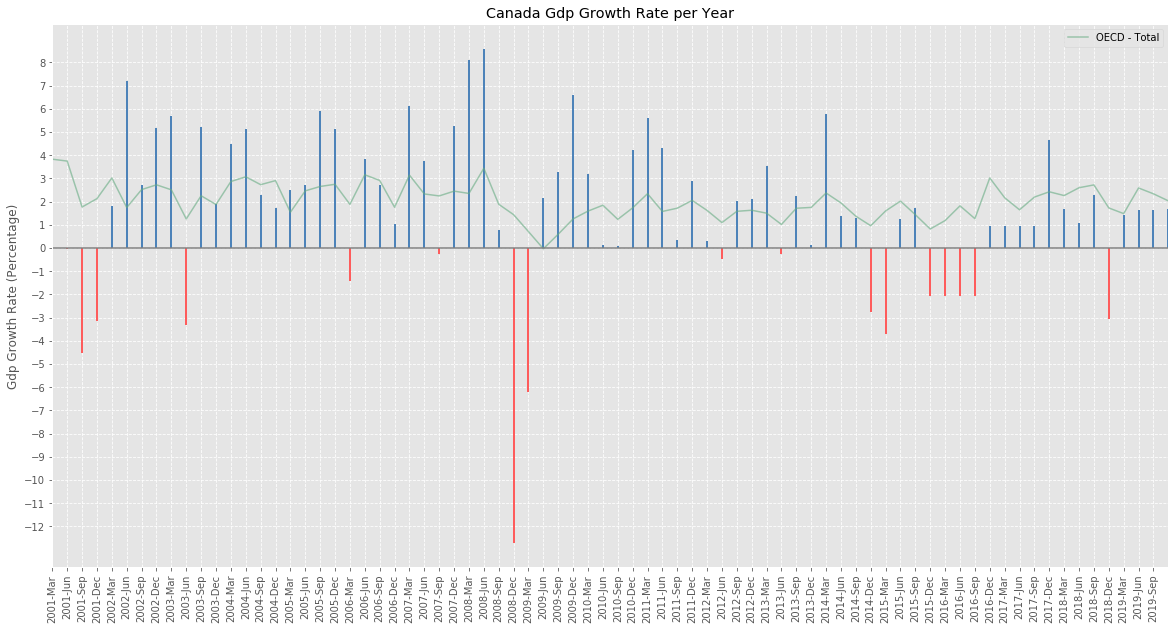

In [7]:
plt.figure(figsize=(20,10))

#繪製世界GDP成長率折線圖(比較用)
gdp_data.loc['OECD - Total'].interpolate(method='nearest').plot(color=colors[2],alpha=0.6)

#繪製加拿大GDP成長率
color_arr = gdp_data.loc['Canada'].interpolate(method='nearest').apply(lambda x :colors[3] if x>0 else colors[0])
plt.vlines(x=gdp_data.columns,ymin=0,ymax=gdp_data.loc['Canada'].interpolate(method='nearest'),color=color_arr,linewidths=2)

#圖表設定
plt.axhline(0,color='gray')  #繪製Y軸座標為零的基準線
plt.title('Canada Gdp Growth Rate per Year')  #圖表標題
plt.ylabel('Gdp Growth Rate (Percentage)')  #Y軸名稱與單位
plt.yticks(np.arange(-12,9,1))  #Y軸刻度設定

#設定時間範圍，避免2020年的異常資料出現
drange = pd.date_range(start='2001-01-01',end='2019-12-01',freq='Q')
plt.xticks(drange,drange.strftime('%Y-%b'),rotation=90)  #X軸刻度設定
plt.xlim(datetime(2001,3,1),datetime(2019,12,31))  #X軸兩端極限設定
plt.grid(linestyle='--')  #圖表輔助格線設定
plt.legend()  #顯示圖例
plt.show()